In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('C:\\Users\\sanja\\OneDrive\\Pictures\\excel\\Diwali_Sales_Data.csv',encoding='latin-1')
df.sample(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
7249,1004386,Kiran,P00331942,F,26-35,30,0,Karnataka,Southern,Aviation,Clothing & Apparel,4,7015.0,NaN,NaN
1820,1001383,Jacobs,P00113042,M,26-35,30,1,Uttarakhand,Central,IT Sector,Food,2,15736.0,NaN,NaN
7812,1003850,Smith,P00223542,F,18-25,23,0,Rajasthan,Northern,Govt,Electronics & Gadgets,2,6143.0,NaN,NaN
5740,1004085,Frazer,P00173942,M,26-35,27,0,Delhi,Central,Govt,Electronics & Gadgets,2,8076.0,NaN,NaN
966,1002552,McGuire,P00173842,M,26-35,30,1,Delhi,Central,Aviation,Food,3,18957.0,NaN,NaN


In [4]:
df.drop(columns=['Status', 'unnamed1'],inplace=True)

In [6]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df.dropna(how='any',inplace=True)

In [12]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [13]:
df.sample(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
3108,1000192,Boeckenhauer,P00160042,F,18-25,20,1,Haryana,Northern,IT Sector,Food,4,12099.0
10120,1001195,Burns,P00317842,F,0-17,17,1,Madhya Pradesh,Central,Hospitality,Beauty,4,3201.0
5985,1005618,Jasper,P00274942,M,18-25,19,0,Gujarat,Western,Automobile,Electronics & Gadgets,2,7990.0
693,1006000,Weirich,P00146742,M,46-50,48,1,Uttar Pradesh,Central,Hospitality,Food,1,19342.0
9434,1004026,Troy,P00174442,F,26-35,28,0,Bihar,Eastern,Banking,Electronics & Gadgets,3,4109.0


In [14]:
top_5_state = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(5).reset_index()

### Top 5 States by revenue

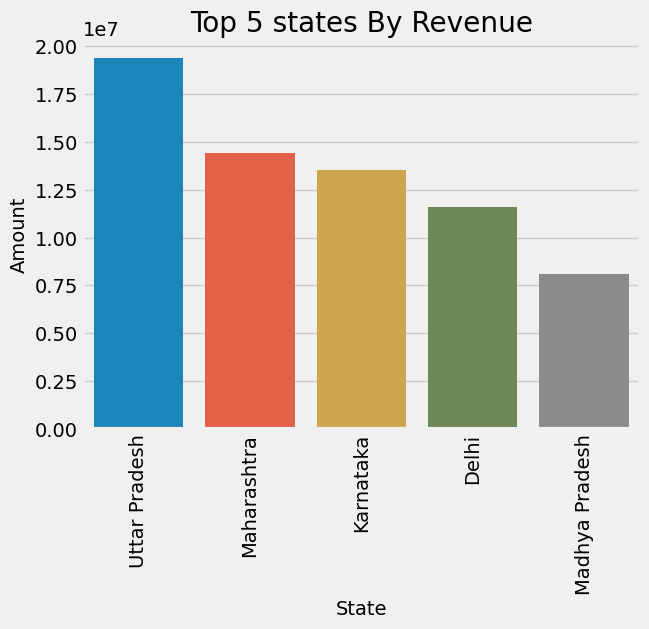

In [15]:
sns.barplot(data=top_5_state, x='State', y='Amount')
plt.xticks(rotation='vertical')
plt.title('Top 5 states By Revenue')
plt.show()

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Top 5 Occupating by Revenue

<Axes: xlabel='Occupation'>

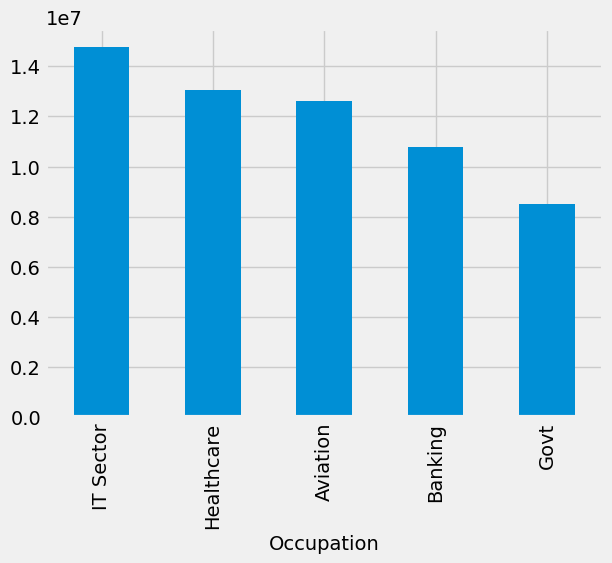

In [20]:
df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

### who makes more orders male or female

<Axes: ylabel='Gender'>

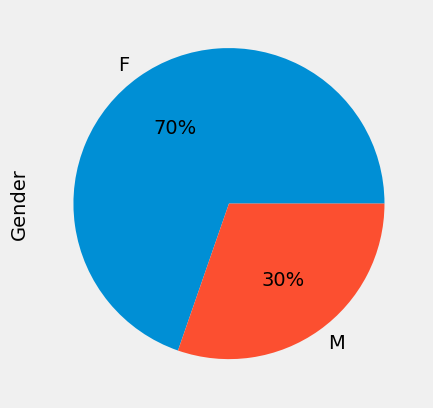

In [23]:
df['Gender'].value_counts().plot(kind='pie',autopct='%1.0f%%')

In [24]:
def seprator(col):
    if col == 1:
        return 'married'
    else:
        return 'unmarried'

In [28]:
df['Marital_Status'] =  df['Marital_Status'].apply(seprator)

### who makes more orders married or unmarried

C:\Users\sanja\AppData\Local\Temp\ipykernel_3044\442604469.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df = df.groupby(['Marital_Status','Gender']).sum().sort_values(by='Amount', ascending=False).reset_index()


<Axes: xlabel='Marital_Status', ylabel='Amount'>

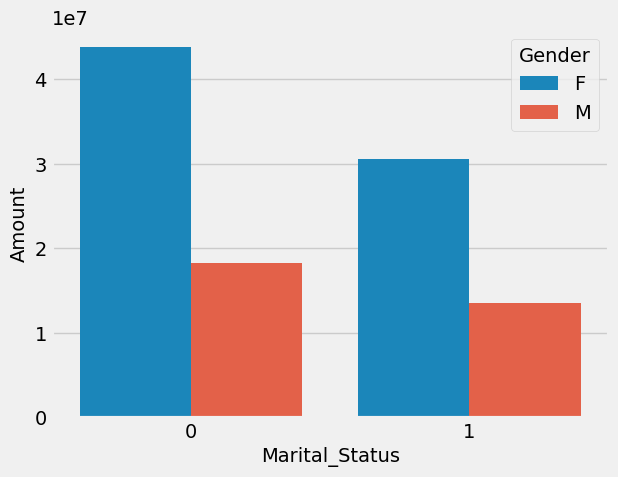

In [11]:
temp_df = df.groupby(['Marital_Status','Gender']).sum().sort_values(by='Amount', ascending=False).reset_index()
sns.barplot(data=temp_df, x='Marital_Status',y='Amount',hue='Gender')

### Top 5 Product Categories which orders most

<Axes: xlabel='Product_Category'>

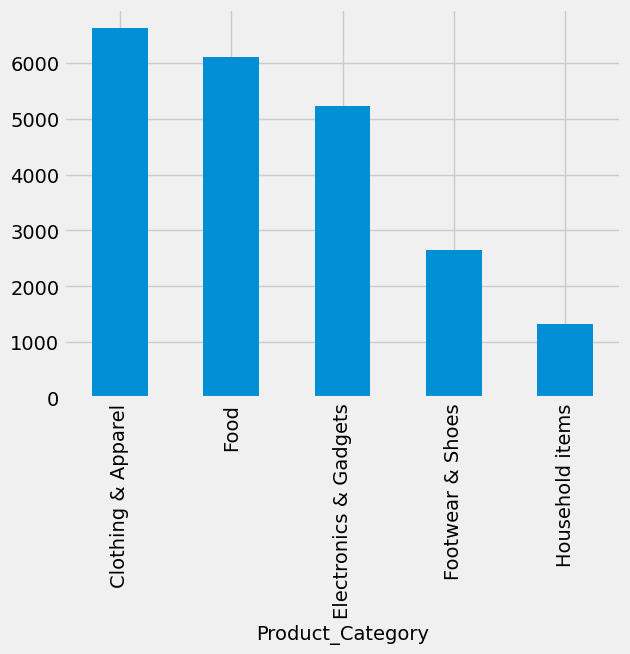

In [40]:
df.groupby('Product_Category')['Orders'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

### Top 5 Categories by revenue

<Axes: xlabel='Product_Category'>

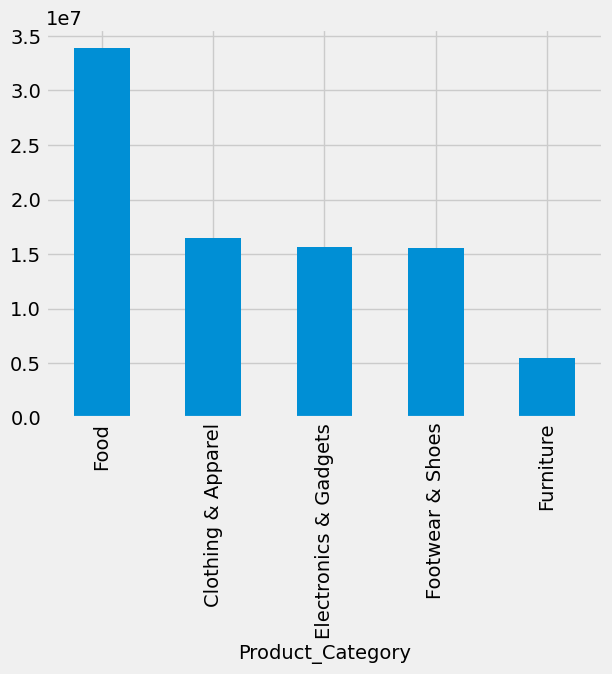

In [61]:
df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

### Top 10 Customers by Orders

<Axes: xlabel='Cust_name'>

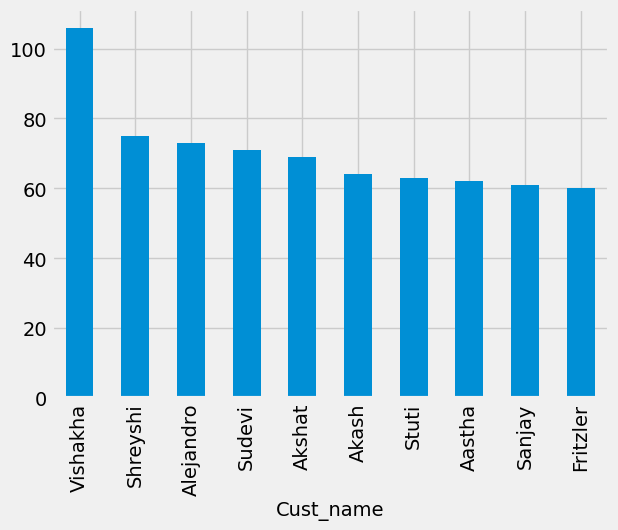

In [47]:
df.groupby('Cust_name')['Orders'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

### Top 10 Cusromers by Revenue

<Axes: xlabel='Cust_name'>

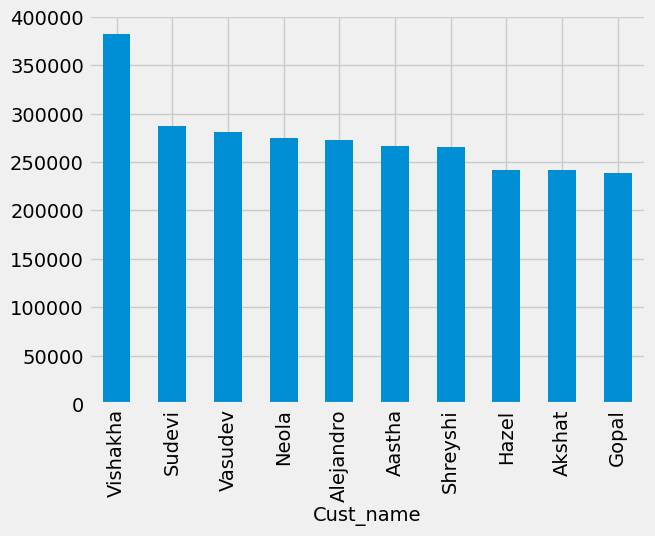

In [48]:
df.groupby('Cust_name')['Amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

In [50]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,married,Gujarat,Western,Food Processing,Auto,2,23877.0


### which age group makes most orders

<Axes: xlabel='Age Group', ylabel='Count'>

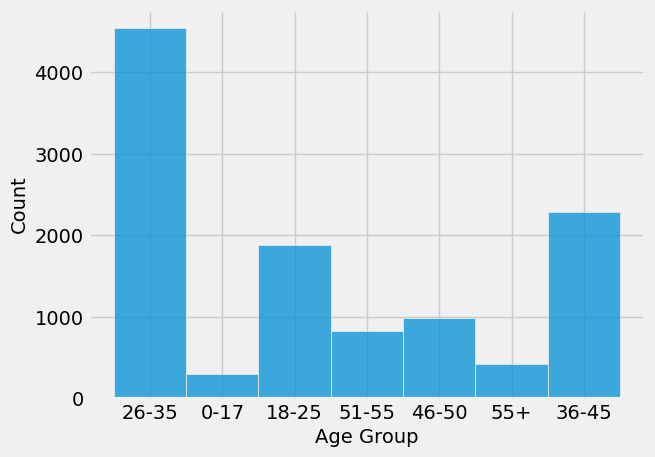

In [58]:
sns.histplot(df['Age Group'])